# Модель для прогнозирования оттока клиентов

Согласно вводным данным заказчика все больше клиентов прекращают пользоваться предоставляемыми банковскими услугами. Маркетологи заказчика посчитали, что сохранять текущих клиентов дешевле, чем привлекать новых.

В связи с этим перед нами поставлена задача сгенерировать модель которая будет предсказывать: уйдёт клиент из банка в ближайшее время или нет.

В рамках проекта предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.  

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Признаки:**
- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата


**Целевой признак:** Exited — факт ухода клиента

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Сохраняем-данные-в-переменную" data-toc-modified-id="Сохраняем-данные-в-переменную-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Сохраняем данные в переменную</a></span></li><li><span><a href="#Проводим-первичное-исследование-на-предмет-наличия-пропусков,-дубликатов" data-toc-modified-id="Проводим-первичное-исследование-на-предмет-наличия-пропусков,-дубликатов-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Проводим первичное исследование на предмет наличия пропусков, дубликатов</a></span><ul class="toc-item"><li><span><a href="#Ставим-заглушку-в-виде-новой-категории--1.-Пропуски-могут-носить-как-технический-характер,-так-и-указывать-на-новых-клиентов." data-toc-modified-id="Ставим-заглушку-в-виде-новой-категории--1.-Пропуски-могут-носить-как-технический-характер,-так-и-указывать-на-новых-клиентов.-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Ставим заглушку в виде новой категории -1. Пропуски могут носить как технический характер, так и указывать на новых клиентов.</a></span></li></ul></li><li><span><a href="#Проверим-на-дубликаты" data-toc-modified-id="Проверим-на-дубликаты-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Проверим на дубликаты</a></span></li><li><span><a href="#Посмотрим-подробнее,-какие-данные-есть-в-датафрейме" data-toc-modified-id="Посмотрим-подробнее,-какие-данные-есть-в-датафрейме-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Посмотрим подробнее, какие данные есть в датафрейме</a></span></li><li><span><a href="#Прибегаем-к-прямому-кодированию-и-устраняем-дамми-ловушку" data-toc-modified-id="Прибегаем-к-прямому-кодированию-и-устраняем-дамми-ловушку-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Прибегаем к прямому кодированию и устраняем дамми-ловушку</a></span></li><li><span><a href="#Делим-выборки-на-обучающую,-валидационную-и-тестовую.-Без-учета-дисбаланса-данных" data-toc-modified-id="Делим-выборки-на-обучающую,-валидационную-и-тестовую.-Без-учета-дисбаланса-данных-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Делим выборки на обучающую, валидационную и тестовую. Без учета дисбаланса данных</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Проверяем-баланс-классов" data-toc-modified-id="Проверяем-баланс-классов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Проверяем баланс классов</a></span></li><li><span><a href="#Модель-решающего-дерева" data-toc-modified-id="Модель-решающего-дерева-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Модель решающего дерева</a></span></li><li><span><a href="#Модель-случайного-леса" data-toc-modified-id="Модель-случайного-леса-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Модель случайного леса</a></span></li><li><span><a href="#Модель-логистической-регрессии" data-toc-modified-id="Модель-логистической-регрессии-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Модель логистической регрессии</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Выделим-выборки-с-учетом-дисбаланса-классов,-методом-стратификации" data-toc-modified-id="Выделим-выборки-с-учетом-дисбаланса-классов,-методом-стратификации-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Выделим выборки с учетом дисбаланса классов, методом стратификации</a></span></li><li><span><a href="#В-каждой-из-моделей-сбалансируем-0-и-1" data-toc-modified-id="В-каждой-из-моделей-сбалансируем-0-и-1-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>В каждой из моделей сбалансируем 0 и 1</a></span><ul class="toc-item"><li><span><a href="#Модель-логистической-регрессии" data-toc-modified-id="Модель-логистической-регрессии-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Модель логистической регрессии</a></span></li><li><span><a href="#Модель-решающего-дерева" data-toc-modified-id="Модель-решающего-дерева-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Модель решающего дерева</a></span></li><li><span><a href="#Модель-случайного-леса" data-toc-modified-id="Модель-случайного-леса-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Модель случайного леса</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></div>

## Подготовка данных

### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
from sklearn.dummy import DummyClassifier 
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import f1_score, precision_score,recall_score, make_scorer, classification_report
from sklearn.metrics import classification_report, 

### Сохраняем данные в переменную

In [2]:
pth1 = 'C:\\Dataset\\Churn.csv'
pth2 = '/datasets/Churn.csv'
# путь в тренажере и на PC

if os.path.exists(pth1):
    customer_data = pd.read_csv(pth1)
elif os.path.exists(pth2):
    customer_data = pd.read_csv(pth2)
else:
    print("Check that the path to the dataset is correct")

pd.set_option('display.max_columns', 50)

backup = customer_data.copy(deep=True)
# На всякий случай пусть будет копия

### Проводим первичное исследование на предмет наличия пропусков, дубликатов

In [3]:
customer_data.info()
# В данных имеются пропуски. Таких данных 0,09%, так что удалим пропуски. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
customer_data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,NaN,130142.79,1,1,0,38190.78,0


#### Ставим заглушку в виде новой категории -1. Пропуски могут носить как технический характер, так и указывать на новых клиентов.

In [6]:
customer_data = customer_data.fillna(-1)
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


### Проверим на дубликаты

In [7]:
print('Количество дубликатов:', customer_data['CustomerId'].duplicated().sum())

Количество дубликатов: 0


In [8]:
customer_data.columns = customer_data.columns.str.lower()
# Приводим названия столбцов к нижнему регистру.
customer_data.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [9]:
customer_data['surname'] = customer_data['surname'].str.lower()
customer_data['geography'] = customer_data['geography'].str.lower()
customer_data['gender'] = customer_data['gender'].str.lower()
# Приводим к нижнему регистру и строки. Это в том числе позволит избавиться от части неявных дубликатов
customer_data.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,hargrave,619,france,female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,hill,608,spain,female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,onio,502,france,female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,boni,699,france,female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,mitchell,850,spain,female,43,2.0,125510.82,1,1,1,79084.10,0


### Посмотрим подробнее, какие данные есть в датафрейме

In [10]:
customer_data.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,hargrave,619,france,female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,hill,608,spain,female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,onio,502,france,female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,boni,699,france,female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,mitchell,850,spain,female,43,2.0,125510.82,1,1,1,79084.10,0


In [11]:
customer_data['surname'].value_counts()
# Фамилия не кажется информативной в контексте оттока клиентов, при том что у нас имеется индетификационный номер клиента.
# Наиболее часто встречается фамилия Смит. Да и то лишь в 30 случаях из 10000.
# Удалим данные, которые могут только помешать в контексте обучения моделей.

smith     32
scott     29
martin    29
walker    28
brown     26
          ..
zotova     1
bold       1
vogel      1
gay        1
morton     1
Name: surname, Length: 2931, dtype: int64

In [12]:
customer_data = customer_data.drop('surname', axis=1)
# как неинформативный удаляем признак, содержащий информацию о фамилии

In [13]:
customer_data = customer_data.drop(['customerid', 'rownumber'], axis=1)
# как неинформативный удаляем признак, содержащий информацию о идентификационном номере клиента

### Прибегаем к прямому кодированию и устраняем дамми-ловушку

In [14]:
customer_data = pd.get_dummies(customer_data, drop_first=True)

customer_data.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_germany,geography_spain,gender_male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


### Делим выборки на обучающую, валидационную и тестовую. Без учета дисбаланса данных

In [15]:
features = customer_data.drop('exited', axis=1)
target = customer_data['exited']

customer_train, customer_temp, customer_train_target, customer_temps = train_test_split(features,
                                                          target,
                                                          test_size=.40,
                                                          random_state=12345)

customer_val, customer_test, customer_val_target, customer_test_target = train_test_split(customer_temp,
                                                    customer_temps,
                                                    test_size=.50,
                                                    random_state=12345)

In [16]:
print(customer_train.shape)
print(customer_train_target.shape)
print(customer_val.shape)
print(customer_val_target.shape)
print(customer_test.shape)
print(customer_test_target.shape)

(6000, 11)
(6000,)
(2000, 11)
(2000,)
(2000, 11)
(2000,)


In [17]:
pd.options.mode.chained_assignment = None
numeric = ['balance', 'estimatedsalary', 'age', 'creditscore']

scaler = StandardScaler()
scaler.fit(customer_train[numeric])

customer_train[numeric] = scaler.transform(customer_train[numeric])
customer_val[numeric] = scaler.transform(customer_val[numeric]) 


## Исследование задачи

### Проверяем баланс классов

In [18]:
customer_data['exited'].value_counts()
# Очевидно имеется дисбаланс классов.

0    7963
1    2037
Name: exited, dtype: int64

### Модель решающего дерева

In [19]:
tree_model = DecisionTreeClassifier(random_state=12345, max_depth=5, min_samples_split=4, min_samples_leaf=2)
tree_model.fit(customer_train, customer_train_target)
predict_tree_model = tree_model.predict(customer_val)
print('Accuracy:', accuracy_score(customer_val_target, predict_tree_model))
#print(confusion_matrix(customer_val_target, predict_tree_model))
print('Recall:', recall_score(customer_val_target, predict_tree_model), '\n'
      'Precision:', precision_score(customer_val_target, predict_tree_model), '\n' 
      'F1:', f1_score(customer_val_target, predict_tree_model))

Accuracy: 0.8535
Recall: 0.41626794258373206 
Precision: 0.7802690582959642 
F1: 0.5429017160686427


### Модель случайного леса

In [20]:
train_dataset = [customer_train, customer_val]
train_target_dataset = [customer_train_target, customer_val_target]
train_dataset = pd.concat(train_dataset)
train_target_dataset = pd.concat(train_target_dataset)

In [21]:
%%time
warnings.simplefilter('ignore')
# Выключил предупреждения, поскольку из-за несбалансированности выборки периодически невозможно посчитать f1

forest_model = RandomForestClassifier(random_state=12345)
parametrs = {
    'n_estimators': range (1, 11),
    'max_depth': range (1,8),
    'min_samples_leaf': range (1,6),
    'min_samples_split': range (2,6)
}

best_forest_model = GridSearchCV(forest_model, parametrs,
                                 scoring=['accuracy', 'f1', 'precision', 'recall'],
                                 refit='f1')

best_forest_model.fit(train_dataset, train_target_dataset)
print(best_forest_model.best_params_)
cv_results = pd.DataFrame(best_forest_model.cv_results_)
best_model_results = cv_results.loc[best_forest_model.best_index_]
print(best_model_results)

{'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 10}
mean_fit_time                                                       0.051026
std_fit_time                                                        0.001168
mean_score_time                                                     0.008917
std_score_time                                                      0.000132
param_max_depth                                                            7
param_min_samples_leaf                                                     4
param_min_samples_split                                                    2
param_n_estimators                                                        10
params                     {'max_depth': 7, 'min_samples_leaf': 4, 'min_s...
split0_test_accuracy                                                    0.86
split1_test_accuracy                                                    0.86
split2_test_accuracy                                                0

In [22]:
print('F1: {:.3f}'.format(best_forest_model.best_score_))

F1: 0.564


### Модель логистической регрессии

In [23]:
logist_model = LogisticRegression(solver='lbfgs', random_state=12345)
logist_model.fit(customer_train, customer_train_target)
predict_logist_model = logist_model.predict(customer_val)
print('Accuracy:', accuracy_score(customer_val_target, predict_logist_model))
print('Recall:', recall_score(customer_val_target, predict_logist_model), '\n'
      'Precision:', precision_score(customer_val_target, predict_logist_model), '\n' 
      'F1:', f1_score(customer_val_target, predict_logist_model))

Accuracy: 0.8025
Recall: 0.23684210526315788 
Precision: 0.5657142857142857 
F1: 0.33389544688026984


**Вывод:**

судя по данным все три модели показывают высокий Accuracy. Модель решающего дерева - 0.86, случайного леса - 0.85, логистической регресии - 0.79. 

При этом в рамках логистической регрессии не удалось вычислить Recall, Precision и F1, поскольку модель предсказывает только нули (текущие клиенты банка) из-за дисбаланса классов.

Модель решающего дерева показала полноту = 0.36 и точность = 0.87. Очевидно из-за дисбаланса классов модель хорошо ищет нули (текущие клиенты банка) и значительно хуже ищет еденицы (отток клиентов банка). 

Модель случайного леса показала полноту = 0.40 и точность = 0.79, F1 = 0.53. Очевидно у данной модели имеются проблемы, аналогичные проблемам решающего дерева. Из-за дисбаланса классов модель хорошо предсказывает нули (текущие клиенты банка) и плохо еденицы (отток клиентов банка).

## Борьба с дисбалансом классов

### Выделим выборки с учетом дисбаланса классов, методом стратификации

In [24]:
# Решение позаимствованно у stackoverflowuser2010
# ссылка https://stackoverflow.com/questions/38250710/how-to-split-data-into-3-sets-train-validation-and-test

# функция по разделения выборок на валидационную, тестовую и обучающую со стратификацией
def split_stratified_into_train_val_test(df_input, stratify_colname='y',
                                         frac_train=0.6, frac_val=0.20, frac_test=0.20,
                                         random_state=None):

    if frac_train + frac_val + frac_test != 1.0:
        raise ValueError('fractions %f, %f, %f do not add up to 1.0' % \
                         (frac_train, frac_val, frac_test))

    if stratify_colname not in df_input.columns:
        raise ValueError('%s is not a column in the dataframe' % (stratify_colname))

    X = df_input 
    y = df_input[[stratify_colname]]

    df_train, df_temp, y_train, y_temp = train_test_split(X,
                                                          y,
                                                          stratify=y,
                                                          test_size=(1.0 - frac_train),
                                                          random_state=random_state)

    relative_frac_test = frac_test / (frac_val + frac_test)
    df_val, df_test, y_val, y_test = train_test_split(df_temp,
                                                      y_temp,
                                                      stratify=y_temp,
                                                      test_size=relative_frac_test,
                                                      random_state=random_state)

    assert len(df_input) == len(df_train) + len(df_val) + len(df_test)

    return df_train, df_val, df_test

In [25]:
client_train, client_val, client_test = \
    split_stratified_into_train_val_test(customer_data, stratify_colname='exited',
                                         frac_train=0.60, frac_val=0.20, frac_test=0.20)
# используем заданную функцию для разделения на выборки

In [26]:
features_client_train = client_train.drop('exited', axis=1)
target_client_train = client_train['exited'] 
# выделяем целевой признак

In [27]:
features_client_val = client_val.drop('exited', axis=1) 
target_client_val = client_val['exited'] 
# выделяем целевой признак

In [28]:
features_client_test = client_test.drop('exited', axis=1)
target_client_test = client_test['exited']
# выделяем целевой признак

In [29]:
print(features_client_train.shape)
print(target_client_train.shape)
print(features_client_val.shape)
print(target_client_val.shape)
print(features_client_test.shape)
print(target_client_test.shape)

(6000, 11)
(6000,)
(2000, 11)
(2000,)
(2000, 11)
(2000,)


### Сбалансируем количество текущих клиентов и отток клиентов (значения 1 и 0 целевого признака)

#### Модель логистической регрессии

In [30]:
# функция дублирует сведения об оттоке клиентов, тем самым устраняя дисбаланс классов
def upsample(features, target):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    ratio_features = (len(target) - target.sum()) / target.sum()
    ratio_features = int(ratio_features)
    features_upsampled = pd.concat([features_zeros] + [features_ones] * ratio_features)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * ratio_features)
    
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled



features_upsampled, target_upsampled = upsample(features_client_train, target_client_train)
features_upsampled_val, target_upsampled_val = upsample(features_client_val, target_client_val)

In [31]:
logist_model = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=12345)
logist_model.fit(features_upsampled, target_upsampled)
predict_logist_model = logist_model.predict(features_upsampled_val)

accuracy= accuracy_score(target_upsampled_val, predict_logist_model)
recall = recall_score(target_upsampled_val, predict_logist_model)
precision = precision_score(target_upsampled_val, predict_logist_model)
f1 = f1_score(target_upsampled_val, predict_logist_model)
print('Accuracy:', accuracy)
print('Recall:', recall, '\n'
      'Precision:', precision, '\n' 
      'F1:', f1)

Accuracy: 0.6697443181818182
Recall: 0.6862745098039216 
Precision: 0.6060606060606061 
F1: 0.6436781609195401


In [32]:
probabilities_valid = logist_model.predict_proba(features_upsampled_val)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 1, 0.02):
    predicted_valid = probabilities_one_valid > threshold 
    precision = precision_score(target_upsampled_val, predicted_valid)
    recall = recall_score(target_upsampled_val, predicted_valid)
    f1 = f1_score(target_upsampled_val, predicted_valid)

    print("Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f}, F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Precision = 0.435, Recall = 1.000, F1 = 0.606
Threshold = 0.02 | Precision = 0.435, Recall = 1.000, F1 = 0.606
Threshold = 0.04 | Precision = 0.435, Recall = 1.000, F1 = 0.606
Threshold = 0.06 | Precision = 0.435, Recall = 1.000, F1 = 0.606
Threshold = 0.08 | Precision = 0.435, Recall = 1.000, F1 = 0.606
Threshold = 0.10 | Precision = 0.435, Recall = 1.000, F1 = 0.606
Threshold = 0.12 | Precision = 0.435, Recall = 1.000, F1 = 0.606
Threshold = 0.14 | Precision = 0.435, Recall = 1.000, F1 = 0.607
Threshold = 0.16 | Precision = 0.436, Recall = 0.998, F1 = 0.606
Threshold = 0.18 | Precision = 0.437, Recall = 0.998, F1 = 0.608
Threshold = 0.20 | Precision = 0.439, Recall = 0.995, F1 = 0.609
Threshold = 0.22 | Precision = 0.443, Recall = 0.993, F1 = 0.613
Threshold = 0.24 | Precision = 0.448, Recall = 0.990, F1 = 0.617
Threshold = 0.26 | Precision = 0.454, Recall = 0.980, F1 = 0.620
Threshold = 0.28 | Precision = 0.462, Recall = 0.975, F1 = 0.627
Threshold = 0.30 | Precis

In [33]:
probabilities_valid = logist_model.predict_proba(features_upsampled_val)[:, 1] > 0.36
auc_roc = roc_auc_score(target_upsampled_val, probabilities_valid)
print('AUC-ROC: {:.2f}'.format(auc_roc))

AUC-ROC: 0.60


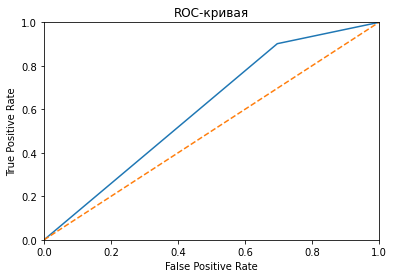

In [34]:
fpr, tpr, thresholds = roc_curve(target_upsampled_val, probabilities_valid)
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.plot([0.0, 1.0], [0.0, 1.0], linestyle='--')
plt.show()

**Вывод:**

несмотря на высокий показатель F1 меры модель показала ресультат немногим лучше случайного предсказания. Модель логистической регрессии кажется переобученной из-за увеличения выборки.

#### Модель решающего дерева

In [35]:
tree_model = DecisionTreeClassifier(random_state=12345, 
                                    max_depth=5, min_samples_split=4, min_samples_leaf=2, 
                                    class_weight='balanced')
tree_model.fit(features_client_train, target_client_train)
predict_tree_model = tree_model.predict(features_client_val)

print('Accuracy:', accuracy_score(target_client_val, predict_tree_model))
print('Recall:', recall_score(target_client_val, predict_tree_model), '\n'
      'Precision:', precision_score(target_client_val, predict_tree_model), '\n' 
      'F1:', f1_score(target_client_val, predict_tree_model))

Accuracy: 0.7625
Recall: 0.7132352941176471 
Precision: 0.44838212634822805 
F1: 0.5506149479659413


#### Модель случайного леса

In [36]:
train_dataset = [features_client_train, features_client_val]
train_target_dataset = [target_client_train, target_client_val]
train_dataset = pd.concat(train_dataset)
train_target_dataset = pd.concat(train_target_dataset)
print(train_dataset.shape)
print(train_target_dataset.shape)

(8000, 11)
(8000,)


In [37]:
%%time

forest_model = RandomForestClassifier(random_state=12345, class_weight='balanced')
parametrs = {
    'n_estimators': range (1, 11),
    'max_depth': range (1,8),
    'min_samples_leaf': range (1,6),
    'min_samples_split': range (2,6)
}

best_forest_model = GridSearchCV(forest_model, parametrs,
                                 scoring=['accuracy', 'f1', 'precision', 'recall'],
                                 refit='f1')

best_forest_model.fit(train_dataset, train_target_dataset)
print(best_forest_model.best_params_)
cv_results = pd.DataFrame(best_forest_model.cv_results_)
best_model_results = cv_results.loc[best_forest_model.best_index_]
print(best_model_results)

{'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 10}
mean_fit_time                                                       0.056313
std_fit_time                                                        0.002578
mean_score_time                                                     0.010171
std_score_time                                                      0.000796
param_max_depth                                                            7
param_min_samples_leaf                                                     1
param_min_samples_split                                                    3
param_n_estimators                                                        10
params                     {'max_depth': 7, 'min_samples_leaf': 1, 'min_s...
split0_test_accuracy                                                0.814375
split1_test_accuracy                                                0.828125
split2_test_accuracy                                                 

In [38]:
print('F1: {:.3f}'.format(best_forest_model.best_score_))

F1: 0.604


In [39]:
predicted_forest = best_forest_model.predict(train_dataset)
auc_roc = roc_auc_score(train_target_dataset, predicted_forest)
print('AUC-ROC: {:.2f}'.format(auc_roc))

AUC-ROC: 0.81


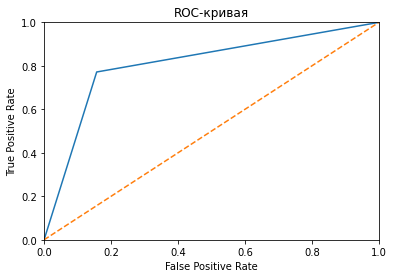

In [40]:
fpr, tpr, thresholds = roc_curve(train_target_dataset, predicted_forest)
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.plot([0.0, 1.0], [0.0, 1.0], linestyle='--')
plt.show()

**Вывод:**

Прибегнув к стратификации и сбалансировав выборки удалось повысить полноту F1 меру во всех моделях за счет точности. Все модели показали меньшее значение accuracy, т.е. доля верно квалифицированных объектов упала. Модель логистической регрессии и случайного леса достигли поставленного уровня F1 меры, а также стали значительно лучше предсказывать отток клиентов за счет повышения полноты.
___
Модель логистической регрессии с дисбалансом классов:

Accuracy: 0.80 | Recall: 0.23 | Precision: 0.56 | F1: 0.33

Модель логистической регрессии после стратификации и нормализации данных: 

Accuracy: 0.67 | Recall: 0.68 | Precision: 0.60 | F1: 0.64
___
Модель решающего дерева с дисбалансом классов:

Accuracy: 0.85 | Recall: 0.41 | Precision: 0.78 | F1: 0.54

Модель решающего дерева после стратификации и нормализации данных:

Accuracy: 0.73 | Recall: 0.77 | Precision: 0.42 | F1: 0.55
___

Модель случайного леса с дисбалансом классов:

Accuracy: 0.88 | Recall: 0.43 | Precision: 0.81 | F1: 0.56

Модель случайного леса после стратификации и нормализации данных:

Accuracy: 0.81 | Recall: 0.70 | Precision: 0.53 | F1: 0.60
___

## Тестирование лучшей модели (случайный лес)

In [41]:
test_predicted = best_forest_model.predict(features_client_test)
print('Accuracy:', accuracy_score(target_client_test, test_predicted))
print('Recall:', recall_score(target_client_test, test_predicted), '\n'
      'Precision:', precision_score(target_client_test, test_predicted), '\n' 
      'F1:', f1_score(target_client_test, test_predicted))

Accuracy: 0.8065
Recall: 0.7199017199017199 
Precision: 0.5176678445229682 
F1: 0.6022610483042138


In [42]:
auc_roc = roc_auc_score(target_client_test, test_predicted)
print('AUC-ROC: {:.2f}'.format(auc_roc))

AUC-ROC: 0.77


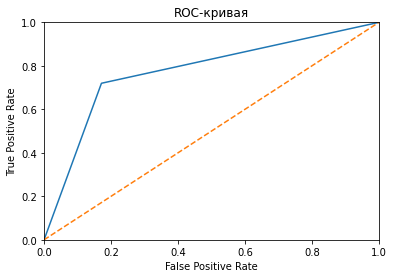

In [43]:
fpr, tpr, thresholds = roc_curve(target_client_test, test_predicted)
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.plot([0.0, 1.0], [0.0, 1.0], linestyle='--')
plt.show()

**Вывод:**

AUC-ROC модели стремится скорее к 1 нежели к 0.5. Тестовая выборка также показала, что переобучения модели нет. Accuracy = 0.81, Recall = 0.72, Precision = 0.51, F1 = 0.60. Модель отвечает заданным параметрам и предсказывает клиентов, которые перестали пользоваться услугами банка.

Если обучать модели без учета дисбаланса классов, то модель покажет результат близкий к полностью случайному предсказанию.

По итогу стратификации данных, изменения их баланса и уменьшения выборки модель случайного леса смогла показать уровень F1 меры выше 0.60. При этом она верно предсказывет клиента, который хочет перестать пользоваться услугами банка в 72% случаев. Модель кажется приемлемой для решения поставленной задачи.